
<a href="https://colab.research.google.com/github/kokchun/Maskininlarning-AI21/blob/main/Exercises/E04_logistic_regression.ipynb" target="_parent"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> &nbsp; to see hints and answers.

---
# Logistic regression exercises 

---
These are introductory exercises in Machine learning with focus in **logistic regression**

<p class = "alert alert-info" role="alert"><b>Note</b> that sometimes you don't get exactly the same answer as I get, but it doesn't neccessarily mean it is wrong. Could be some parameters, randomization, that we have different. Also very important is that in the future there won't be any answer sheets, use your skills in data analysis, mathematics and statistics to back up your work.</p>

<p class = "alert alert-info" role="alert"><b>Note</b> that in cases when you start to repeat code, try not to. Create functions to reuse code instead. </p>

<p class = "alert alert-info" role="alert"><b>Remember</b> to use <b>descriptive variable, function, index </b> and <b> column names</b> in order to get readable code </p>

The number of stars (\*), (\*\*), (\*\*\*) denotes the difficulty level of the task

---

## 0. Iris flower dataset (*)

In the whole exercise, we will work with the famous Iris flower dataset, which was collected in 1936 by Ronald Fisher, a statistician and biologist. Use the ```datasets``` module from scikit-learn to load the iris dataset. 

&nbsp; a) Check keys on the loaded data and check what the different values for each key are.

&nbsp; b) Now insert the data into a DataFrame. 

&nbsp; c) Do some EDA to get an understanding of the dataset. 

&nbsp; d) Make a correlation heatmap to see how each feature is correlated to each other. What do the numbers mean?

&nbsp; e) Make a boxplot. The points outside of the boxplot are statistically calculated outliers using Tukey's rule for boxplot. 

&nbsp; f) Now remove the outliers in data. (**)

- Lower bound outlier: $Q_1 - 1.5\cdot IQR$
- Upper bound outlier: $Q_3 + 1.5\cdot IQR$

where $Q_1$ is the 1st quartile or 25 percentile, $Q_3$ is the 3rd quartile or 75 percentile and $IQR = Q_3-Q_1$ is the interquartile range. 

<details>

<summary>Hint</summary>

a) For DESCR key you need to print it.

f) Dataframes has a quantile method.  

</details>

<details>

<summary>Answer</summary>

b) 

|    |   sepal length (cm) |   sepal width (cm) |   petal length (cm) |   petal width (cm) |   species | specie_name   |
|---:|--------------------:|-------------------:|--------------------:|-------------------:|----------:|:--------------|
|  0 |                 5.1 |                3.5 |                 1.4 |                0.2 |         0 | setosa        |
|  1 |                 4.9 |                3   |                 1.4 |                0.2 |         0 | setosa        |
|  2 |                 4.7 |                3.2 |                 1.3 |                0.2 |         0 | setosa        |
|  3 |                 4.6 |                3.1 |                 1.5 |                0.2 |         0 | setosa        |
|  4 |                 5   |                3.6 |                 1.4 |                0.2 |         0 | setosa        |

c) When you do describe, remove species as its statistical values are meaningless. 

|                   |    mean |      std |   min |   25% |   50% |   75% |   max |
|:------------------|--------:|---------:|------:|------:|------:|------:|------:|
| sepal length (cm) | 5.84333 | 0.828066 |   4.3 |   5.1 |  5.8  |   6.4 |   7.9 |
| sepal width (cm)  | 3.05733 | 0.435866 |   2   |   2.8 |  3    |   3.3 |   4.4 |
| petal length (cm) | 3.758   | 1.7653   |   1   |   1.6 |  4.35 |   5.1 |   6.9 |
| petal width (cm)  | 1.19933 | 0.762238 |   0.1 |   0.3 |  1.3  |   1.8 |   2.5 |


<img src = "../assets/pairplot_iris.png" height=300>

Do more EDA than I show here. 

d) Correlation heatmap

<img src = "../assets/Correlation_iris.png" height=300>

The closer the value is to 1 between two features, the more positively linear relationships between them. The closer the value is to -1 the more negatively linear relationships between them. 

e) 

<img src = "../assets/boxplot_iris.png" height=200>

f)
Outlier rows are: [13, 15, 22, 23, 24, 41, 43, 44, 98, 106, 117, 119, 131]

value counts:

|            |   specie_name |
|:-----------|--------------:|
| versicolor |            49 |
| virginica  |            46 |
| setosa     |            42 |

</details>

---

In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets

plt.style.use('seaborn-white')

a) Check keys on the loaded data and check what the different values for each key are.

In [3]:
df = datasets.load_iris(as_frame = True)
df = df.frame
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [4]:
flower_copy = datasets.load_iris()

In [5]:
flower_copy.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [6]:
flower_copy

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [7]:
flower_copy.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [8]:
# For DESCR key you need to print it.
print(flower_copy["DESCR"])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

b) Now insert the data into a DataFrame.

In [9]:
iris_df = pd.DataFrame(data = flower_copy.data, columns=flower_copy.feature_names)
# Reference: https://www.stackvidhya.com/convert-sklearn-dataset-to-pandas-dataframe-in-python/

In [10]:
target_df = pd.DataFrame(data= flower_copy.target, columns= ['species'])
target_df

,species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


Reference: https://medium.com/analytics-vidhya/linear-regression-using-iris-dataset-hello-world-of-machine-learning-b0feecac9cc1#:~:text=The%20Iris%20Dataset%20There%20are%203%20species%20in,of%20the%20flower%20that%20was%20studied%20and%20recorded.

In [11]:
def converter(specie):
    if specie == 0:
        return 'setosa'
    elif specie == 1:
        return 'versicolor'
    else:
        return 'virginica'
target_df['specie_name'] = target_df['species'].apply(converter)
# Concatenate the DataFrames
iris_df = pd.concat([iris_df, target_df], axis= 1)

In [12]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,specie_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


c) Do some EDA to get an understanding of the dataset.

In [13]:
iris_df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5
species,150.0,1.000000,0.819232,0.0,0.0,1.00,2.0,2.0


In [14]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int32  
 5   specie_name        150 non-null    object 
dtypes: float64(4), int32(1), object(1)
memory usage: 6.6+ KB


d) Make a correlation heatmap to see how each feature is correlated to each other. What do the numbers mean?

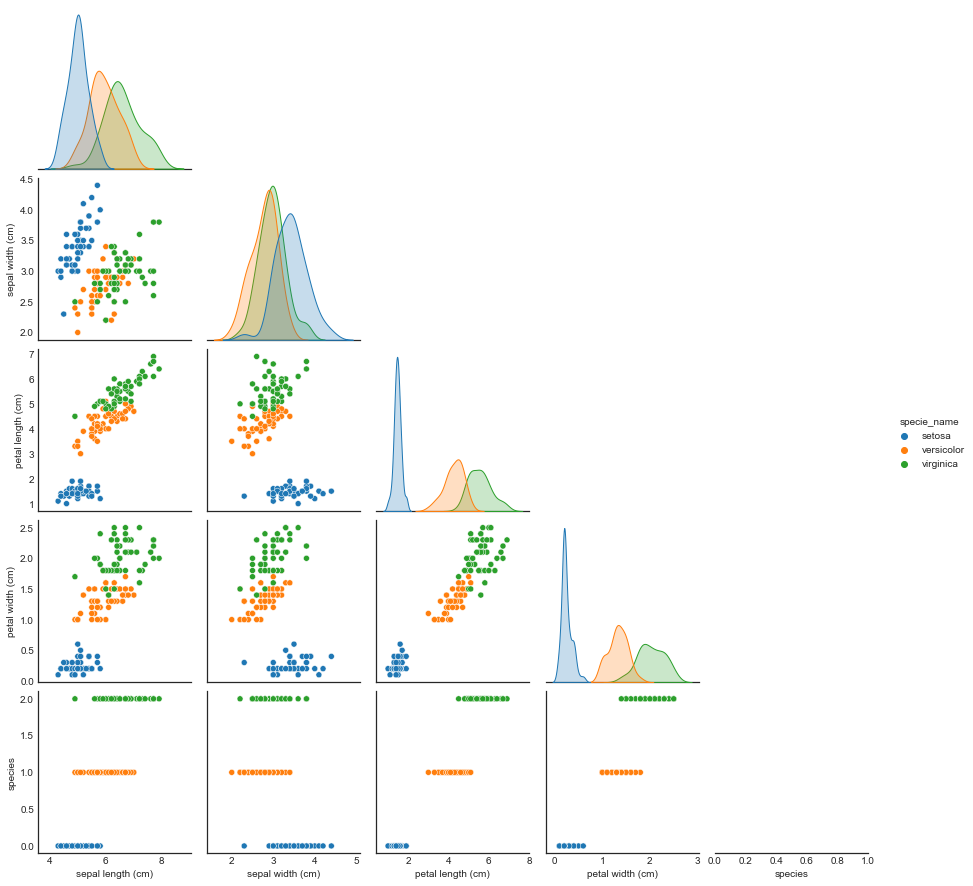

In [15]:
# plot pairwise relationships in a df
ax = sns.pairplot(iris_df, hue= 'specie_name', corner=True)

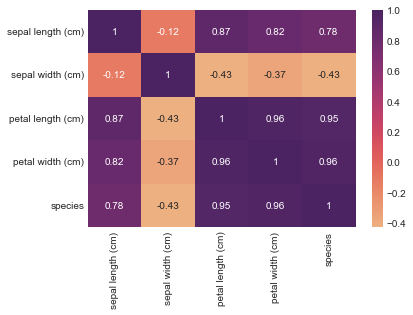

In [16]:
ax = sns.heatmap(iris_df.corr(), cmap="flare", annot=True)
# annot : bool or rectangular dataset, optional, If True, write the data value in each cell.

e) Make a boxplot. The points outside of the boxplot are statistically calculated outliers using Tukey's rule for boxplot. 

Text(0.5, 1.03, 'Box plots for different features')

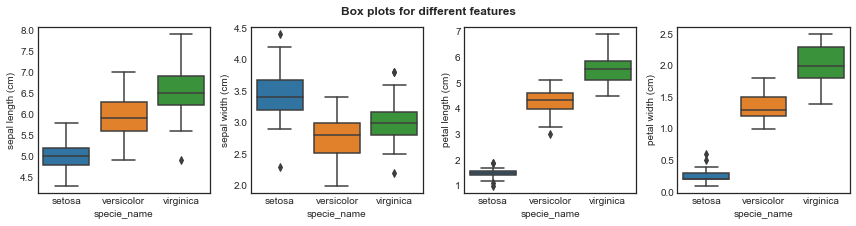

In [17]:
fig, axes = plt.subplots(1, 4, figsize=(12, 3))

for ax, feature in zip(axes, iris_df.columns):
    sns.boxplot(data=iris_df, x="specie_name", y=feature, ax=ax)


fig.tight_layout()
fig.suptitle("Box plots for different features", y=1.03, fontweight="bold")

f) Now remove the outliers in data. (**)

- Lower bound outlier: $Q_1 - 1.5\cdot IQR$
- Upper bound outlier: $Q_3 + 1.5\cdot IQR$

where $Q_1$ is the 1st quartile or 25 percentile, $Q_3$ is the 3rd quartile or 75 percentile and $IQR = Q_3-Q_1$ is the interquartile range. 

In [18]:
iris = iris_df.copy()

In [19]:
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,specie_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [20]:
def df_remove_outliers(df):
    
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1

    df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
    
    return df

In [21]:
df_full = pd.DataFrame()
for i in range(0,3):
    df = iris[iris['species']==i]
    df_i = df_remove_outliers(df)

    df_full = pd.concat([df_full, df_i])

C:\Users\YunaLiu-AIU21GBG\AppData\Local\Temp\ipykernel_12788\2521903556.py:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
C:\Users\YunaLiu-AIU21GBG\AppData\Local\Temp\ipykernel_12788\2521903556.py:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
C:\Users\YunaLiu-AIU21GBG\AppData\Local\Temp\ipykernel_12788\2521903556.py:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=F

In [22]:
df_full

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,specie_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


df = iris[iris['species']==0]
df_0 = df_remove_outliers(df)

df = iris[iris['species']==1]
df_1 = df_remove_outliers(df)

df = iris[iris['species']==2]
df_2 = df_remove_outliers(df)


df_full = pd.concat([df_0, df_1, df_2])

In [23]:
new_index = df_full.index.to_list()
index = range(0,150)

https://stackoverflow.com/questions/43859804/compare-two-list-and-output-missing-and-extra-element-python

In [24]:
set1 = set(index)
set2 = set(new_index)

missing = list(sorted(set1 - set2))
print(f'Outlier rows are: {missing}')

Outlier rows are: [13, 15, 22, 23, 24, 41, 43, 44, 98, 106, 117, 119, 131]


In [25]:
pd.DataFrame(df_full['specie_name'].value_counts())

,specie_name
versicolor,49
virginica,46
setosa,42


## 1. Split and scale data (*)

Do train|test split and scale the data using feature standardization, I used default test size 0.33 and random state 42. Check the mean and standard deviation on training and test data. 

---

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_full.drop(['species', 'specie_name'], axis=1), df_full['species'], test_size =0.33, random_state = 42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(91, 4)
(46, 4)
(91,)
(46,)


In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)
 
print(f"Mean of traning data: {scaled_X_train.mean():.4f}")
print(f"Standard Deviation of traning data: {scaled_X_train.std():.4f}")
print(f"Mean of test data: {scaled_X_test.mean():.4f}")
print(f"Standard Deviation of test data: {scaled_X_test.std():.4f}")

Mean of traning data: 0.0000
Standard Deviation of traning data: 1.0000
Mean of test data: 0.0700
Standard Deviation of test data: 0.9867


## 2. Classify with logistic regression (*)

Use k-folded cross-validation with logistic regression to find suitable hyperparameters and model. Check the documentation to see which parameters that can be chosen through cross-validation. Check the models parameters and see what it has chosen. 

<details>

<summary>Answer</summary>

weights: 

```py
array([[-1.33033256,  1.35076961, -2.26169407, -2.07715072],
       [ 0.40073538, -0.28598722, -0.58388865, -0.7782766 ],
       [ 0.67977172, -0.81485664,  3.09503329,  3.10542664]])
```

$\ell_1$-ratio:

```py
array([0.2, 0.2, 0.2])
```


<img src = "../assets/pairplot_iris.png" height=300>

Do more EDA than I show here. 

d) Correlation heatmap

<img src = "../assets/Correlation_iris.png" height=300>

The closer the value is to 1 between two features, the more positively linear relationships between them. The closer the value is to -1 the more negatively linear relationships between them. 

e) 

<img src = "../assets/boxplot_iris.png" height=200>

f)
Outlier rows are: [13, 15, 22, 23, 24, 41, 43, 44, 98, 106, 117, 119, 131]

value counts:

|            |   specie_name |
|:-----------|--------------:|
| versicolor |            49 |
| virginica  |            46 |
| setosa     |            42 |

</details>

---

In [28]:
# penalty='L2', ridgeCV by default
# so we don not have L1 ratio for LassoCV
from sklearn.linear_model import LogisticRegressionCV
log_model = LogisticRegressionCV(cv=5, random_state=42)
# cv=5 is enough for the size of the data
log_model.fit(scaled_X_train, y_train)
print(f'weights: {log_model.coef_}')
print(f'intercepts:{log_model.intercept_}')

weights: [[-1.36614394  1.30963933 -2.19153453 -2.04089148]
 [ 0.54190307 -0.40719044 -0.67405175 -0.86395707]
 [ 0.82424087 -0.90244889  2.86558627  2.90484855]]
intercepts:[-0.39945237  2.55066245 -2.15121008]


In [29]:
# use elasticnet with saga solver
# max_iter=10000 to make model convergent.

from sklearn.linear_model import LogisticRegressionCV
log_model = LogisticRegressionCV(l1_ratios=[0, 0.00001, 0.0001, 0.001, 0.01, .1, .2, .5], penalty='elasticnet', solver='saga', max_iter=10000, random_state=42)
# cv=5 by default
log_model.fit(scaled_X_train, y_train)
print(f'l1_ratios for the three classes: {log_model.l1_ratio_}')
# Lasso has a probability of 20%, Ridge has a probability of 80% for the three classes
# one vs rest (class1 vs not class1, class2 vs not class2, class3 vs not class3)

print(f'weights: {log_model.coef_}')
print(f'intercepts:{log_model.intercept_}')

l1_ratios for the three classes: [0.2 0.2 0.2]
weights: [[-1.33033256  1.35076961 -2.26169407 -2.07715072]
 [ 0.40073538 -0.28598722 -0.58388865 -0.7782766 ]
 [ 0.67977172 -0.81485664  3.09503329  3.10542664]]
intercepts:[-0.38394304  2.62201754 -2.2380745 ]


https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html#sklearn.linear_model.LogisticRegressionCV


from sklearn.datasets import load_iris

from sklearn.linear_model import LogisticRegressionCV

X, y = load_iris(return_X_y=True)

clf = LogisticRegressionCV(cv=5, random_state=0).fit(X, y)

clf.predict(X[:2, :])

clf.predict_proba(X[:2, :]).shape

clf.score(X, y)

## 3. Evaluate model (*)

Make a prediction on the testing data. 

&nbsp; a) Check manually the first 10 values of $y_{test}$ against your prediction. 

&nbsp; b) Plot a confusion matrix. Can you see which predictions the model have mispredicted?

&nbsp; c) Print a classification report 

<details>

<summary>Answer</summary>


b) 

<img src = "../assets/confusion_matrix_iris.png" height=300>



c) 

Classification report 

```py
          precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.94      0.97        16
           2       0.94      1.00      0.97        16

    accuracy                           0.98        46
   macro avg       0.98      0.98      0.98        46
weighted avg       0.98      0.98      0.98        46
```






</details>

---

In [31]:
# use elasticnet with saga solver
# max_iter=10000 to make model convergent.

from sklearn.linear_model import LogisticRegressionCV
log_model = LogisticRegressionCV(l1_ratios=[0, 0.00001, 0.0001, 0.001, 0.01, .1, .2, .5], penalty='elasticnet', solver='saga', max_iter=10000, random_state=42)
# cv=5 by default
log_model.fit(scaled_X_train, y_train)
print(f'l1_ratios for the three classes: {log_model.l1_ratio_}')
# Lasso has a probability of 20%, Ridge has a probability of 80% for the three classes
# one vs rest (class1 vs not class1, class2 vs not class2, class3 vs not class3)

print(f'weights: {log_model.coef_}')
print(f'intercepts:{log_model.intercept_}')


y_pred = log_model.predict(scaled_X_test)
prediction = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})


l1_ratios for the three classes: [0.2 0.2 0.2]
weights: [[-1.33033256  1.35076961 -2.26169407 -2.07715072]
 [ 0.40073538 -0.28598722 -0.58388865 -0.7782766 ]
 [ 0.67977172 -0.81485664  3.09503329  3.10542664]]
intercepts:[-0.38394304  2.62201754 -2.2380745 ]


In [40]:
prediction['compare'] = np.where(prediction.y_test == prediction.y_pred, True, False)
prediction.head(10)

,y_test,y_pred,compare
115,2,2,True
114,2,2,True
12,0,0,True
31,0,0,True
136,2,2,True
74,1,1,True
72,1,1,True
127,2,2,True
146,2,2,True
93,1,1,True


In [42]:
np.sum(prediction['compare'].head(10))

10

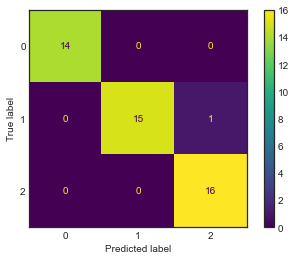

In [50]:
# Confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
df_full['specie_name']
cm = confusion_matrix(y_test, y_pred, labels = log_model.classes_)

disp = ConfusionMatrixDisplay(cm)
disp.plot()

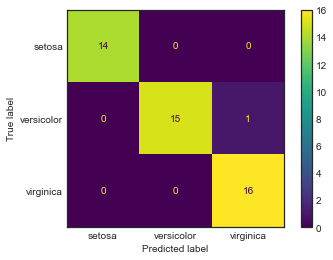

In [51]:
# Confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
df_full['specie_name']
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(cm, display_labels=df_full['specie_name'].unique())
disp.plot()

I find that there is one observation which is false predicted: true value of 1 but predicted label of 2.

In [52]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.94      0.97        16
           2       0.94      1.00      0.97        16

    accuracy                           0.98        46
   macro avg       0.98      0.98      0.98        46
weighted avg       0.98      0.98      0.98        46



## 4. $k$-folded cross-validation for evaluation (**)

To be more robust in reporting the results, you should report the results as $\mu_{score} \pm \sigma_{score}$, i.e. average $\pm$ standard deviation of the score through a k-folded cross-validation. Report the score for precision, recall, f1-score for each label and overal accuracy. Do the cross-validation manually using for statement. 